# Семинар по трехмерной геометрии и градиентному спуску

### Визуализация функции от двух переменных

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
%matplotlib inline

In [2]:
def plot_3d(fun, a=-1, b=1, c=-1, d=1, trace=None):
    """
    Визуализирует функцию fun на квадрате [a, b] x [c, d]
    fun : функция, принимающая два аргумента 
         (np.array одинакового размера) и возвращающая
          np.array того же размера со значениями функции
          в соответствующих точках
    Дополнительно возможно нарисовать ломаную линию из N точек,
    лежащую на получившейся поверхности
    trace : np.array размера N x 2 - координаты на плоскости,
            обозначающие точки ломаной
    """
    fig = plt.figure()

    # Make grid
    x1_ = np.linspace(a, b, 100)
    x2_ = np.linspace(c, d, 100)
    x1, x2 = np.meshgrid(x1_, x2_)
    y = fun(x1, x2)

    # Plot the surface
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x1, x2, y, alpha=0.6)
    ax.contour(x1, x2, y, zdir='z', 
                  offset=y.min(), cmap=cm.coolwarm)
    
    # Plot 3d line 
    if trace is not None:
        y_trace = fun(trace[:, 0], trace[:, 1])
        ax.plot(trace[:, 0], trace[:, 1], y_trace, "o-")
        ax.set_xlim(x1.min(), x1.max())
        ax.set_ylim(x2.min(), x2.max())
        ax.set_zlim(y.min(), y.max())

Вам дана функция, визуализирующая поверхности. Ознакомьтесь с ее интерфейсом.

Например, отобразим трехмерную параболу:

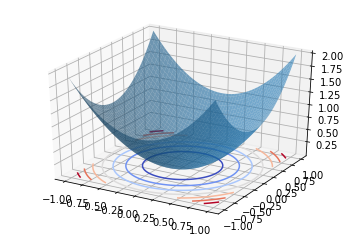

In [3]:
fun = lambda x1, x2: x1**2 + x2**2
plot_3d(fun)

Круги на плоскости показывают проекции линий уровня поверхности.

Нарисуйте плоскость $y = x_1 + 2 x_2 + 3$:

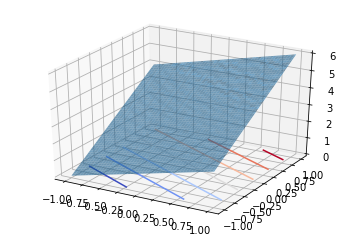

In [4]:
# your code here
fun = lambda x1, x2: x1 + 2*x2 + 3
plot_3d(fun)

Нарисуйте плоскость, параллельную любой из горизонтальных осей:

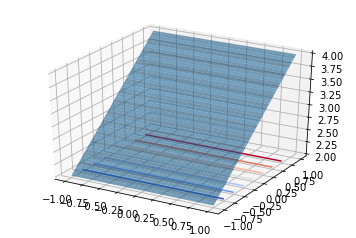

In [6]:
# your code here
fun = lambda x1, x2: x2 + 3 
plot_3d(fun)

Нарисуйте плоскость, проходящую через начало координат:

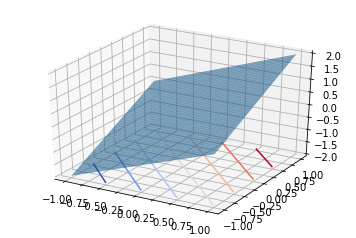

In [7]:
# your code here
fun = lambda x1, x2: x2 + x1 
plot_3d(fun)

### Вычисление градиентов функции

Градиент функции $f(x) = f(x_1, \dots, x_d)$ от многих переменных - это вектор ее частных производных.
$$\nabla_x f = \biggl(\frac{\partial f}{\partial x_1}, \dots, \frac{\partial f}{\partial x_1} \biggr )$$

Разберем два простых примеры вычисления градиента в случае функции от двух переменных.

__Теоретическая задача 1.__ Найдите градиент линейной функции $f(x) = f(x_1, x_2) = c_1 x_1 + c_2 x_2$ ($c_1$ и $c_2$ - фиксированные числа). 

$$\nabla_x f = (c_1, c_2)$$

Если непонятно, можно взять конкретные коэффициенты, например $c_1 = 3$ и $c_2 = 7$. 

__Теоретическая задача 2.__ Найдите градиент квадратичной функции $f(x) = f(x_1, x_2) = c_1 x_1^2 + c_2 x_2^2$ ($c_1$ и $c_2$ - фиксированные числа). 

$$\nabla_x f = (2 c_1 x_1, 2 c_2 x_2)$$

Если $c1=c2=c$, $\nabla_x f = 2cx$.

Ясно, что минимум такой квадратичной функции достигается в 0.
Наша следующая цель - найти этот минимум с помощью градиентного спуска. 

Воспользуемся кодом квадратичной функции (выше) и обобщим ее на случай любых коэффициентов:

In [ ]:
def fun(x1, x2, c1=1, c2=1):
    return c1*x1**2 + c2*x2**2

Теперь надо реализовать ее градиент. Напишите код функции вычисления градиента в одной точке согласно описанию:

In [9]:
def grad_fun(x1, x2, c1=1, c2=1):
    """
    Функция берет 2 числа, обозначающую точку вычисления градиента,
    и возвращает np.array размера (2,) - градиент квадратичной функции
    Опциональные аргументы: c1 и c2 - коэффициенты
    """
    ### your code here
    return np.array([2*c1*x1, 2*c2*x2])

Проверьте правильность (сверьте с формулой):

In [10]:
grad_fun(x1=0.5, x2=1.5, c1=2, c2=3)

array([ 2.,  9.])

Теперь реализуем градиентны спуск. 
Он работает следующим образом: 
1. сначала инициализируется начальная точка x (это уже сделано)
1. затем повторяются итерации:
$$x = x - \alpha \nabla f x$$
Здесь $\alpha$ - длина шага.

Допишите функцию согласно описанию:

In [33]:
def grad_descend(grad_fun, step_size=0.1, num_steps=10):
    """
    Реализует градиентный спуск
    Аргументы:
    * grad_fun - функция, вычисляющая градиент
    * step_size - длина шага
    * num_steps - число итераций
    
    Возвращает np.array размера (num_steps+1) x 2, 
    (i+1)-й элемент - точка на (i+1)-й итеарации,
    нулевой элемент - случайная инициализация
    """
    
    res = np.zeros((num_steps + 1, 2))
    x = np.random.rand(2) * 4 - 2
    print (x)
    
    ### your code here
    for i in range(num_steps+1):
        print (grad_fun(x1 = x[0], x2 = x[1]))
        x = x - step_size*grad_fun(x1 = x[0], x2 = x[1])
        res[i] = x #= np.(res, x)
    return res
        
    

In [34]:
grad_descend(grad_fun, step_size=0.5,  num_steps=10)

[-0.02491616  0.35730482]
[-0.04983231  0.71460963]
[ 0.  0.]
[ 0.  0.]
[ 0.  0.]
[ 0.  0.]
[ 0.  0.]
[ 0.  0.]
[ 0.  0.]
[ 0.  0.]
[ 0.  0.]
[ 0.  0.]


array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

Протестируем функцию (последний элемент должен быть близок к 0):

In [35]:
trace = grad_descend(grad_fun)
trace

[-1.64646438 -0.59526955]
[-3.29292876 -1.19053911]
[-2.63434301 -0.95243129]
[-2.10747441 -0.76194503]
[-1.68597952 -0.60955602]
[-1.34878362 -0.48764482]
[-1.0790269  -0.39011586]
[-0.86322152 -0.31209268]
[-0.69057721 -0.24967415]
[-0.55246177 -0.19973932]
[-0.44196942 -0.15979145]
[-0.35357553 -0.12783316]


array([[-1.3171715 , -0.47621564],
       [-1.0537372 , -0.38097252],
       [-0.84298976, -0.30477801],
       [-0.67439181, -0.24382241],
       [-0.53951345, -0.19505793],
       [-0.43161076, -0.15604634],
       [-0.34528861, -0.12483707],
       [-0.27623089, -0.09986966],
       [-0.22098471, -0.07989573],
       [-0.17678777, -0.06391658],
       [-0.14143021, -0.05113327]])

Теперь мы готовы визуализировать градиентный спуск. Для этого передайте нашу траекторию оптимизации в качестве последнего аргумента функции plot_3d.

In [ ]:
### your code here


Может потребоваться запустить ячейку пару раз, чтобы траекторию было лучше видно.

Запустите оптимизацию несколько раз, чтобы посмотреть, как ведет себя процесс в зависимости от начального приближения:

In [ ]:
### your code here


Попробуйте разную длину шага (0.01, 0.1, 0.5, 1). Рекомендуется перед запуском градиентного спуска написать np.random.seed(<число>), чтобы все запуски были из одного начального приближения.

In [ ]:
### your code here


При маленькой длине шага процесс идет сишком медленно, при большой - может разойтись.

Наконец, попробуем использовать другие коэффициенты. Оптимизируйте функцию $f(x) = x_1^2 + 5 x_2^2$, пробуя длину шага (0.1, 0.2, 0.5):

In [ ]:
### your code here


"Вытянутую" функцию сложнее оптимизировать. Именно поэтмоу данные рекомендуется нормировать перед обучением модели, чтобы избежать таких колебаний при оптимизации.